In [1]:
import torch
import numpy as np
from Packages.RegistrationFunc import *
from Packages.SplitEbinMetric import *
from Packages.GeoPlot import *
import scipy.io as sio
import matplotlib.pyplot as plt
import SimpleITK as sitk

## I/O convention
Due to the certain reason of Kris' simulated data generation, please follow the i/o convention below which is symmetric, to make sure the files are read and written correctly. Following example is for 2D situation, 3D case is analogous.
### Read
Shape of input_tensor.nhdr is [w, h, 3], and Shape of input_mask.nhdr is [w, h]
```
input_tensor = np.transpose(sitk.GetArrayFromImage(sitk.ReadImage(path)),(2,1,0))
input_mask = np.transpose(sitk.GetArrayFromImage(sitk.ReadImage(path)),(1,0))
```
input_tensor.shape is [3, h, w], and input_mask.shape is [h, w]
### Write
output_tensor.shape is [3, h, w], and output_mask.shape is [h, w]
```
output_tensor = sitk.WriteImage(sitk.GetImageFromArray(np.transpose(output_tensor,(2,1,0)), path)
output_mask = sitk.WriteImage(sitk.GetImageFromArray(np.transpose(output_tensor,(2,1,0)), path)
```
Shape of output_tensor.nhdr is [w, h, 3], and Shape of output_mask.nhdr is [w, h]

### Note
`sitk.WriteImage(sitk.GetImageFromArray())` and `sitk.GetArrayFromImage(sitk.ReadImage(path))` is a pair of inverse operation, and you can see there is no inconsistence with regards to the dimension issue.
```
output_tensor = np.zeros((12,34,56,78))
sitk.WriteImage(sitk.GetImageFromArray(output_tensor), path)
input_tensor = sitk.GetArrayFromImage(sitk.ReadImage(path))
print(input_tensor)
'(12,34,56,78)'
```

## Import data

In [2]:
index0, index1 = 1, 2
g00 = torch.from_numpy(sitk.GetArrayFromImage(sitk.ReadImage(f'Data/Cubic/cubic{index0}_scaled_tensors.nhdr'))).double().permute(2,1,0)
g11 = torch.from_numpy(sitk.GetArrayFromImage(sitk.ReadImage(f'Data/Cubic/cubic{index1}_scaled_tensors.nhdr'))).double().permute(2,1,0)

height, width = 100,100
g0, g1 = torch.zeros(height, width, 2, 2, dtype=torch.double), torch.zeros(height, width, 2, 2, dtype=torch.double)
g0[:,:,0, 0] = g00[0]
g0[:,:,0, 1] = g00[1]
g0[:,:,1, 0] = g00[1]
g0[:,:,1, 1] = g00[2]
g1[:,:,0, 0] = g11[0]
g1[:,:,0, 1] = g11[1]
g1[:,:,1, 0] = g11[1]
g1[:,:,1, 1] = g11[2]

torch.Size([100, 100, 3])


## Calculate geodesic

In [3]:
Tpts = 7
geo_group = get_geo(g0, g1, 0.5, Tpts)

/home/sci/hdai/Projects/Atlas2D/Packages/SplitEbinMetric.py:197: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370141920/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  Ind_inRange = (theta < 0).nonzero().reshape(-1)


## Plot geodesic

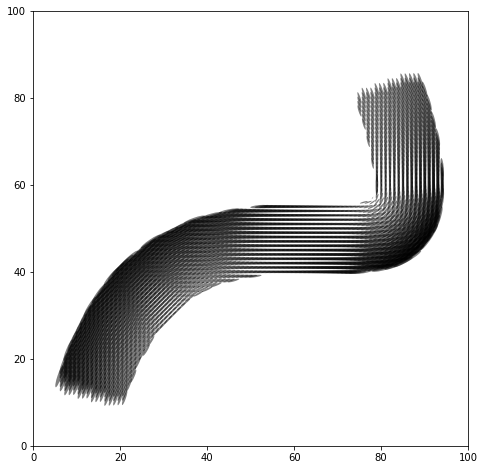

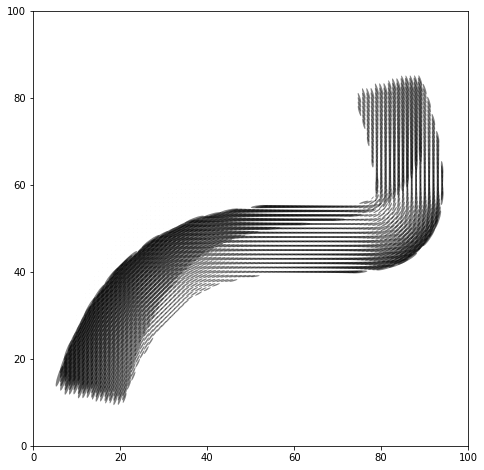

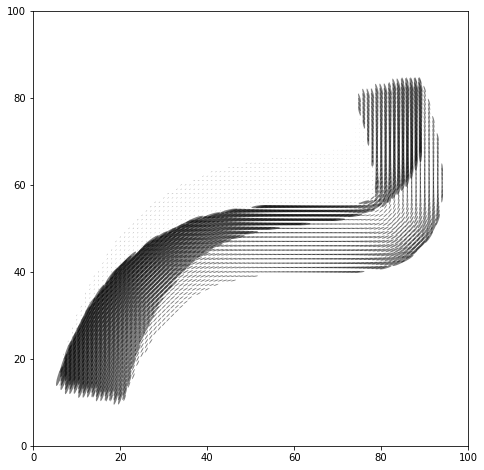

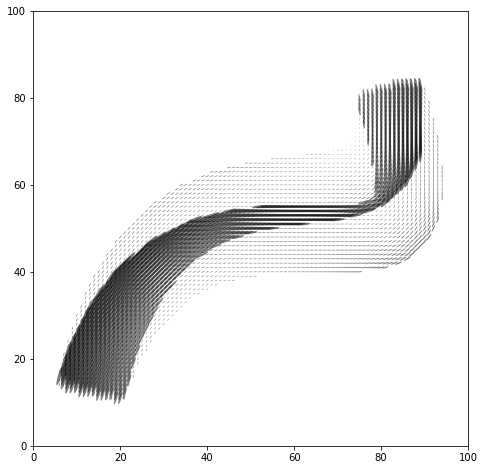

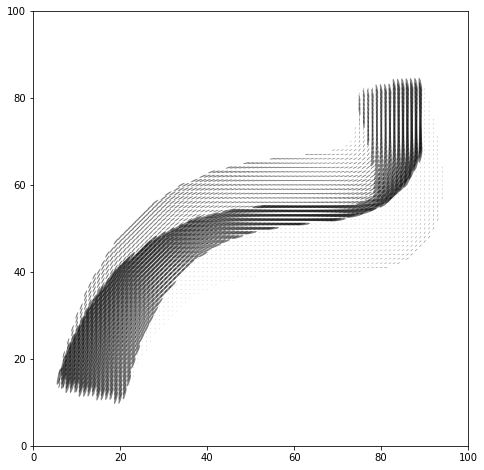

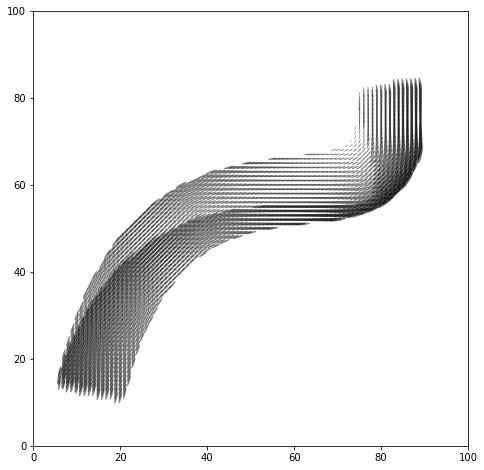

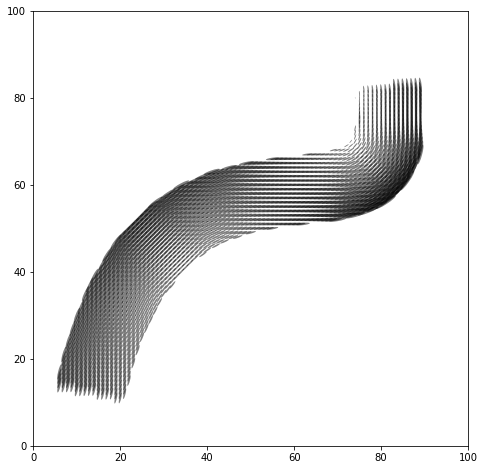

In [7]:
geoi = torch.zeros((3,height,width))
for i in range(Tpts):
    geoi[0]=geo_group[i][:,:,0,0]
    geoi[1]=geo_group[i][:,:,0,1]
    geoi[2]=geo_group[i][:,:,1,1]
    vis_tensors_kris(geoi, title='', save_file=False, filename='', mask=None,scale=5e-1,opacity=0.5, show_axis_labels=True, ax=None,zorder=1,stride=None)
    sitk.WriteImage(sitk.GetImageFromArray(geoi.permute(2,1,0).numpy()), f'Output/cubic_12_geodesic_{Tpts}/cubic_12_geodesic_{i}.nhdr')

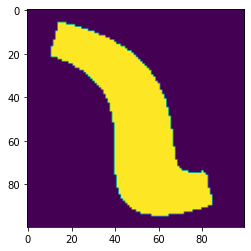

In [11]:
mask00 = torch.from_numpy(sitk.GetArrayFromImage(sitk.ReadImage(f'Data/Cubic/cubic{index0}_filt_mask.nhdr'))).double().permute(1,0)
mask11 = torch.from_numpy(sitk.GetArrayFromImage(sitk.ReadImage(f'Data/Cubic/cubic{index1}_filt_mask.nhdr'))).double().permute(1,0)
mask = mask00+mask11
mask_bin = np.zeros_like(mask)
mask_bin[mask>0] = 1
plt.imshow(mask_bin)
plt.show()
# print(mask_bin.shape)
sitk.WriteImage(sitk.GetImageFromArray(mask_bin.transpose()), f'Output/cubic_12_geodesic_{7}/cubic_12_filt_mask.nhdr')